In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Table - Challenge Sprinklr(Performance de cada conta).csv')

In [12]:
# --- Question 1: Region with the lowest total reach
region_reach = df.groupby('Region')['Reach'].sum().reset_index()
lowest_reach_region = region_reach.loc[region_reach['Reach'].idxmin()]['Region']

In [13]:
print(f"1. Region with the lowest reach: {lowest_reach_region}")
region_reach

1. Region with the lowest reach: North


,Region,Reach
0,Central west,562210.0
1,North,427538.0
2,Northeast,572295.0
3,South,587774.0
4,Southeast,1251603.0


In [9]:
# --- Question 2: Region with highest average engagement rate
region_engagement = df.groupby(['Region']).apply(
    lambda x: x['Engagement'].sum() / x['Posts'].sum()
).reset_index(name='Avg Engagement Rate')
highest_engagement_region = region_engagement.loc[region_engagement['Avg Engagement Rate'].idxmax()]['Region']

C:\Users\NECSOFT\AppData\Local\Temp\ipykernel_6000\2539134691.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  region_engagement = df.groupby(['Region']).apply(


In [10]:
print(f"2. Region with highest average engagement rate: {highest_engagement_region}")

region_engagement

2. Region with highest average engagement rate: Southeast


,Region,Avg Engagement Rate
0,Central west,16.539326
1,North,17.795250
2,Northeast,15.051784
3,South,13.247183
4,Southeast,20.064234


In [11]:
# --- Question 3: Top 3 stores by average reach per post
df['Avg Reach per Post'] = df['Reach'] / df['Posts']
top_stores = df.sort_values('Avg Reach per Post', ascending=False).head(3)[['Account', 'Region', 'Avg Reach per Post']]

print("3. Top 3 stores by average reach per post:")
print(top_stores.to_string(index=False))

3. Top 3 stores by average reach per post:
Account    Region  Avg Reach per Post
Loja 85 Southeast         2392.813333
Loja 64     South         1109.430769
Loja 44 Southeast         1108.981132


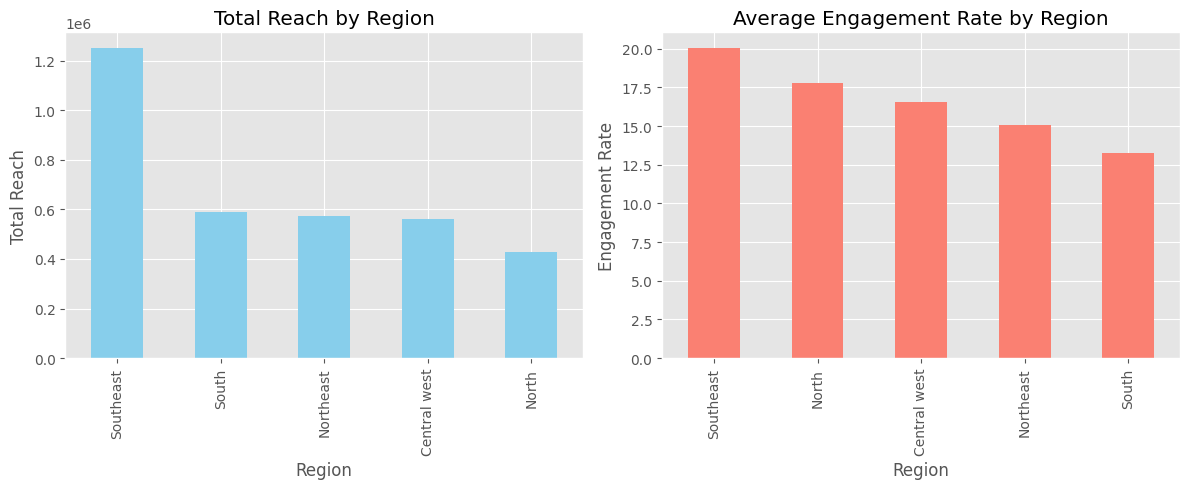

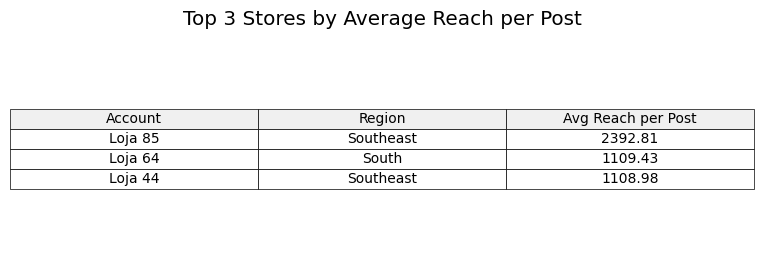

1. Region with the lowest reach: North
2. Region with highest average engagement rate: Southeast
3. Top 3 stores by average reach per post:
Account    Region  Avg Reach per Post
Loja 85 Southeast         2392.813333
Loja 64     South         1109.430769
Loja 44 Southeast         1108.981132


In [ ]:
plt.style.use('ggplot')  # Use a built-in style like 'ggplot' or 'bmh'

# Figure 1: Regional Reach and Engagement
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart 1: Total Reach by Region
region_reach.sort_values('Reach', ascending=False).plot(
    kind='bar', x='Region', y='Reach', ax=ax1, color='skyblue', legend=False
)
ax1.set_title('Total Reach by Region')
ax1.set_ylabel('Total Reach')

# Bar Chart 2: Average Engagement Rate by Region
region_engagement.sort_values('Avg Engagement Rate', ascending=False).plot(
    kind='bar', x='Region', y='Avg Engagement Rate', ax=ax2, color='salmon', legend=False
)
ax2.set_title('Average Engagement Rate by Region')
ax2.set_ylabel('Engagement Rate')

plt.tight_layout()

# Figure 2: Top Stores Table
fig2, ax3 = plt.subplots(figsize=(8, 3))
ax3.axis('off')
table = ax3.table(
    cellText=top_stores.round(2).values,
    colLabels=top_stores.columns,
    loc='center',
    cellLoc='center',
    colColours=['#f0f0f0']*3  # Light gray header
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
ax3.set_title('Top 3 Stores by Average Reach per Post')

plt.show()

# Print Results
print(f"1. Region with the lowest reach: {lowest_reach_region}")
print(f"2. Region with highest average engagement rate: {highest_engagement_region}")
print("3. Top 3 stores by average reach per post:")
print(top_stores.to_string(index=False))